이번 주차 과제는 간단한 이미지 데이터를 활용해 크기가 큰 데이터의 차원 축소를 진행하고 데이터의 라벨에 따라 클러스터링을 진행하는 과제입니다.

###필요한 모듈을 가져오세요.

In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Image data 가져오기
https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

###위 링크의 fashion mnist 데이터의 train dataset과 test dataset을 가져오세요.
(데이터의 용량이 크니 직접 다운로드 하지 말고 코드를 이용해 가져오도록 해보세요.)

In [26]:
print(tf.__version__)   # Tensorflow 버전 출력

2.17.0


In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

###데이터에 대한 정보들을 보여주세요.
(필수: 요약, 모양, 크기, 결측치 여부 등)

In [28]:
print('X_train shape = ',X_train.shape)
print('y_train shape = ',y_train.shape)
print('X_test shape = ',X_test.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (60000, 28, 28)
y_train shape =  (60000,)
X_test shape =  (10000, 28, 28)
y_test shape =  (10000,)


In [29]:
print(len(X_train)) 
print(len(y_train)) 
print(len(X_test)) 
print(len(y_test)) 

60000
60000
10000
10000


In [30]:
# 데이터 타입 확인
print(X_train.dtype) 
print(y_train.dtype) 
print(X_test.dtype) 
print(y_test.dtype) 

uint8
uint8
uint8
uint8


In [31]:
# 요약 정보 확인
# 각 이미지를 1차원 벡터로 변환 (28x28 -> 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

df_train = pd.DataFrame(X_train_flat) #데이터 프레임 변환
print("\nTraining data summary:\n", df_train.describe())
df_test = pd.DataFrame(X_test_flat) 
print("\nTest data summary:\n", df_test.describe())


Training data summary:
                 0             1             2             3             4    \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000800      0.005783      0.030083      0.103800      0.249683   
std        0.092554      0.249033      0.767868      2.512017      4.331376   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    119.000000    164.000000    224.000000   

                5             6             7             8             9    \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.414717      0.821667      2.224733      5.698667     14.434650   
std        5.827394      8

In [32]:
# 결측치 확인
missing_train = df_train.isnull().sum().sum()
print("\nNumber of missing values in train data:", missing_train)
missing_test = df_test.isnull().sum().sum()
print("\nNumber of missing values in test data:", missing_test)


Number of missing values in train data: 0

Number of missing values in test data: 0


### Data중 첫 번째 이미지를 보여주세요.

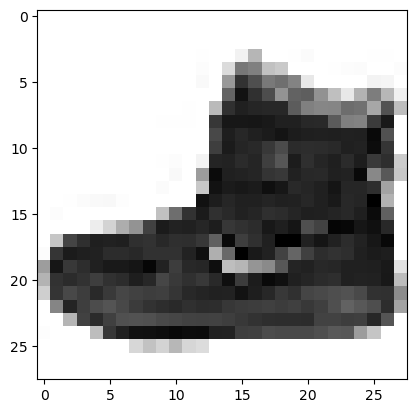

In [34]:
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

# 이미지 전처리

### 이미지 데이터를 머신러닝에 이용하기 편한 형태로 바꾸어 합니다.
(torch model 사용 - tensor 형태로 바꾸기 등)

In [35]:
import torch

In [36]:
X_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1) 
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 데이터셋 형태 출력
print("X_train_tensor shape:", X_train_tensor.shape) 
print("y_train_tensor shape:", y_train_tensor.shape)  
print("X_test_tensor shape:", X_test_tensor.shape) 
print("y_test_tensor shape:", y_test_tensor.shape)  

# 변환된 텐서 확인 (예: 첫 번째 이미지)
print("First image tensor:", X_train_tensor[0])
print("First label tensor:", y_train_tensor[0])

X_train_tensor shape: torch.Size([60000, 1, 28, 28])
y_train_tensor shape: torch.Size([60000])
X_test_tensor shape: torch.Size([10000, 1, 28, 28])
y_test_tensor shape: torch.Size([10000])
First image tensor: tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0

### 이미지 데이터는 픽셀 값이 0 - 255로 이루어져 있습니다. 이 값을 0 - 1까지의 값으로 normalize 해주세요.

In [37]:
X_train_norm = X_train_tensor / 255.0
X_test_norm = X_test_tensor / 255.0

### 추가적인 이미지 전처리를 진행해주세요.
(차원을 수정하는 것은 뒤의 문제에서 진행할 것이므로 여기에서 하지 마세요.)

# 차원 축소
차원 축소란 고차원 데이터를 효율적으로 처리하기 위한 기법입니다.
### 그 중 대표적인 PCA와 t-sne에 대한 내용을 비교하여 아래에 적어주세요.

PCA:  분산을 보존하면서 서로 직교하는 새 축을 찾아 고차원 공간 표본을 선형 연관성 없는 저차원 공간으로 변환하는 기법\
데이터의 전체적인 구조와 분산을 유지함.\
차원이 감소되면서 군집화되어 있는 데이터들이 뭉개져 구별하기 힘들다는 단점이 있음.
\
\
t-SNE: 고차원 데이터에 대해 각 데이터 사이 '거리'를 최대한 보존하는 방식으로 차원을 축소하는 기법\
저차원의 데이터 분포가 t분포를 따르도록 하기 때문에 t-SNE라고 부름\
분포의 분산뿐 아니라 이웃 간 거리까지 고려함\
고차원 데이터를 시각화하는 데 주로 쓰이고, 비선형 분석에 해당함.

## PCA

### 현재 데이터는 28*28로 784차원을 가지고 있습니다. PCA를 이용하여 데이터들을 가장 잘 설명하는 50개의 변수만으로 데이터를 변환하시오.

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 2D 배열로 변환 (각 이미지는 28x28)
n_samples, height, width = X_train.shape
X = X_train.reshape(n_samples, -1)  # (60000, 784)

# 데이터 정규화 (평균 0, 분산 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용하여 50개 주성분으로 변환
pca = PCA(n_components=50)
X_pca50 = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca50.shape)

Original shape: (60000, 784)
Transformed shape: (60000, 50)


### PCA 이후 데이터들의 설명된 분산 비율 (explained variance ratio)를 출력하세요.

In [47]:
explained_var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each component:")
print(explained_var_ratio)

Explained variance ratio for each component:
[0.22083547 0.14414633 0.05461176 0.05088686 0.04054887 0.03019511
 0.02747539 0.02313654 0.01692637 0.01318043 0.01170103 0.00962364
 0.00906441 0.00861006 0.00743008 0.00730325 0.00661558 0.00631515
 0.00621938 0.00584283 0.00523388 0.00511121 0.00473533 0.00450079
 0.00438704 0.00417085 0.00398339 0.00390544 0.00377662 0.00373523
 0.00363114 0.00351611 0.00336014 0.00330921 0.00328005 0.00317479
 0.00305199 0.00296453 0.00284596 0.00282912 0.00275401 0.00268058
 0.00261913 0.00254354 0.00247389 0.00240091 0.00236883 0.00227841
 0.00220926 0.00213938]


### PCA를 시행하면 데이터가 수정되므로 원본 데이터와 차이가 생기게 됩니다. 이때 이 차이를 재구성 오차(Reconstruction Error)라고 합니다. 재구성 오차를 mse(오차제곱합) 방식으로 구하시오.

In [48]:
from sklearn.metrics import mean_squared_error

# PCA 역변환 통해 데이터 복원
X_reconstructed = pca.inverse_transform(X_pca50)

# 재구성 오차 (Reconstruction Error) mse로 계산
mse = mean_squared_error(X_scaled, X_reconstructed)
print("Mean Squared Error (Reconstruction Error):", mse)

Mean Squared Error (Reconstruction Error): 0.19936064819516977


### 이번에는 PCA를 통해 원본 데이터를 30차원으로 줄이고, explained variance ratio와 reconstructon error를 구하시오.

In [55]:
# 30개 주성분으로 변환
pca = PCA(n_components=30)
X_pca30 = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca30.shape)

Original shape: (60000, 784)
Transformed shape: (60000, 30)


In [56]:
explained_var_ratio_30 = pca.explained_variance_ratio_
print("Explained variance ratio for each component(30):")
print(explained_var_ratio_30)

Explained variance ratio for each component(30):
[0.22083547 0.14414633 0.05461176 0.05088686 0.04054887 0.03019511
 0.02747539 0.02313654 0.01692637 0.01318043 0.01170103 0.00962364
 0.00906441 0.00861006 0.00743007 0.00730324 0.00661557 0.00631512
 0.00621936 0.0058428  0.00523297 0.00511105 0.00473347 0.00450044
 0.00438655 0.00416146 0.00396397 0.00390212 0.00376907 0.00370525]


In [57]:
X_30_reconstructed = pca.inverse_transform(X_pca30)

mse_30 = mean_squared_error(X_scaled, X_30_reconstructed)
print("Mean Squared Error (Reconstruction Error):", mse_30)

Mean Squared Error (Reconstruction Error): 0.25586518149818166


### 데이터를 30차원으로 줄인 결과와 50차원으로 줄인 결과에는 어떤 차이가 있습니까?

Reconstruction Error가 30차원으로 줄였을 때보다 50차원으로 줄였을 때가 값이 더 낮았다.\
차원 수가 높을수록 원본 데이터와의 차이가 덜하다는 것을 확인했다.

### 마지막으로 원본 데이터를 2차원으로 줄이고, explained variance ratio와 reconstruction error를 구하시오.

In [58]:
# 2개 주성분으로 변환
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca2.shape)

Original shape: (60000, 784)
Transformed shape: (60000, 2)


In [59]:
explained_var_ratio_2 = pca.explained_variance_ratio_
print("Explained variance ratio for each component(2):")
print(explained_var_ratio_2)

Explained variance ratio for each component(2):
[0.22083547 0.14414633]


In [60]:
X_2_reconstructed = pca.inverse_transform(X_pca2)

mse_2 = mean_squared_error(X_scaled, X_2_reconstructed)
print("Mean Squared Error (Reconstruction Error):", mse_2)

Mean Squared Error (Reconstruction Error): 0.6350182008929813


### 2차원으로 축소한 데이터를 시각화하여 보여주세요. 대신 데이터의 label에 따라 색상을 다르게 해주세요.

C:\Users\sihyun\AppData\Local\Temp\ipykernel_1524\3693227913.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels)) # 라벨 색상 매핑


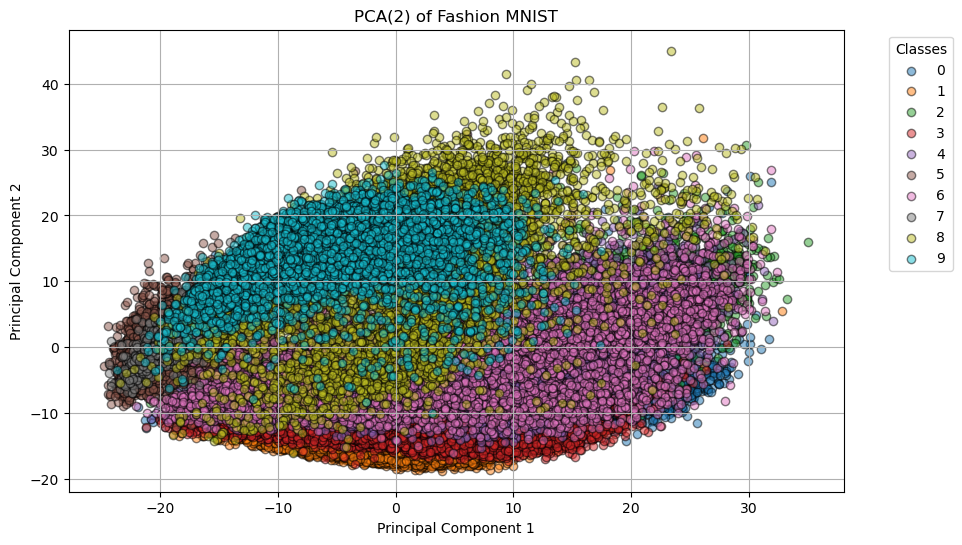

In [62]:
unique_labels = np.unique(y_train) # 라벨의 고유값 (각 클래스의 라벨)

colors = plt.cm.get_cmap('tab10', len(unique_labels)) # 라벨 색상 매핑

plt.figure(figsize=(10, 6))
for label in unique_labels:
    plt.scatter(X_pca2[y_train == label, 0], 
                X_pca2[y_train == label, 1], 
                label=label, 
                color=colors(label), 
                alpha=0.5, 
                edgecolor='k')

plt.title('PCA(2) of Fashion MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

## T-SNE

### 앞서 pca를 통해 50차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

In [64]:
from sklearn.manifold import TSNE

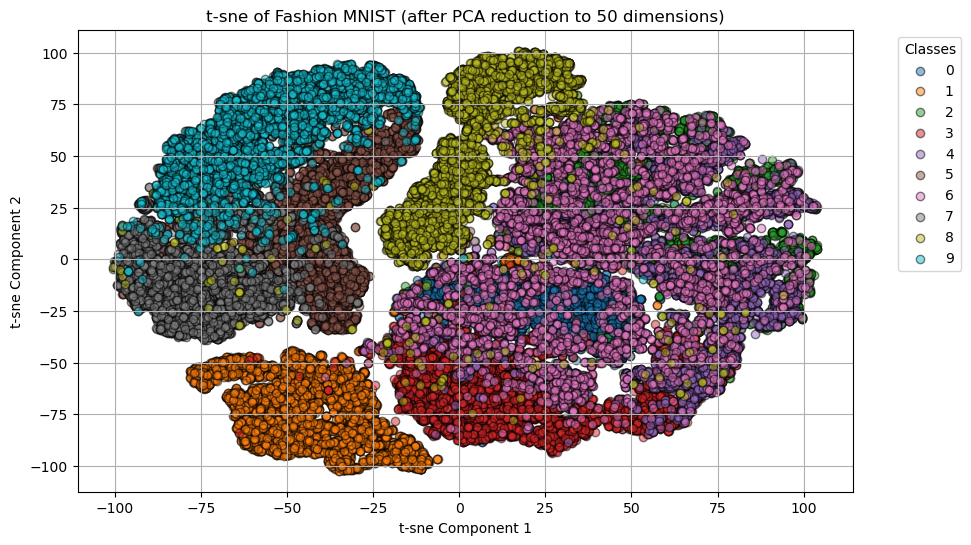

In [65]:
# t-SNE로 2차원 변환
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_pca50)

plt.figure(figsize=(10, 6))
for label in unique_labels:
    plt.scatter(X_tsne[y_train == label, 0], 
                X_tsne[y_train == label, 1], 
                label=label, 
                color=colors(label), 
                alpha=0.5, 
                edgecolor='k')

plt.title('t-sne of Fashion MNIST (after PCA reduction to 50 dimensions)')
plt.xlabel('t-sne Component 1')
plt.ylabel('t-sne Component 2')
plt.legend(title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

### 앞서 pca를 통해 30차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

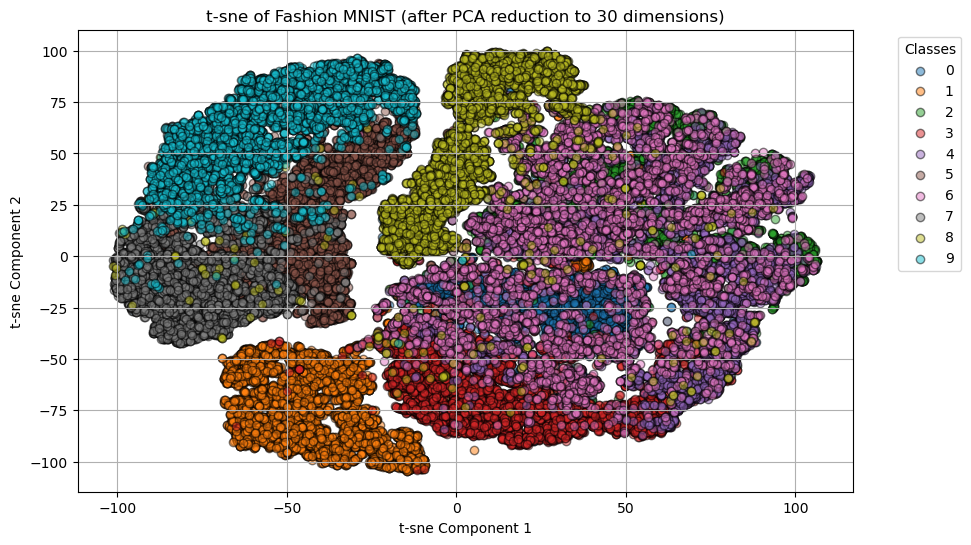

In [66]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_30_tsne = tsne.fit_transform(X_pca30)

plt.figure(figsize=(10, 6))
for label in unique_labels:
    plt.scatter(X_30_tsne[y_train == label, 0], 
                X_30_tsne[y_train == label, 1], 
                label=label, 
                color=colors(label), 
                alpha=0.5, 
                edgecolor='k')

plt.title('t-sne of Fashion MNIST (after PCA reduction to 30 dimensions)')
plt.xlabel('t-sne Component 1')
plt.ylabel('t-sne Component 2')
plt.legend(title='Classes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

## 군집화

### PCA를 통해 50차원으로 줄인 데이터를 DBSCAN을 이용하여 군집화 하시오.

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=10) # eps: 이웃을 찾기 위한 거리의 최대값, min_samples: 이웃으로 고려할 최소 포인트 수
dbscan_labels = dbscan.fit_predict(X_pca50)

# 군집 결과 요약 출력
labels, counts = np.unique(dbscan_labels[dbscan_labels != -1], return_counts=True)

cluster_results = pd.DataFrame({'Cluster': labels, 'Count': counts})

# 노이즈 포인트 수 추가
noise_count = np.sum(dbscan_labels == -1)
cluster_results = cluster_results.append({'Cluster': 'Noise', 'Count': noise_count}, ignore_index=True)

print("DBSCAN Clustering Results:")
print(cluster_results)

DBSCAN Clustering Results:
   Cluster  Count
0        0   3917
1        1   3419
2        2   4338
3        3    127
4        4    243
5        5    104
6        6     18
7        7     59
8        8     35
9        9     11
10      10      7
11      11     12
12      12     24
13      13     18
14      14     19
15      15     55
16      16      8
17      17     29
18      18     27
19      19     28
20      20     31
21      21     14
22      22     10
23      23     13
24      24     12
25      25     13
26      26     18
27      27      4
28      28      9
29      29      7
30      30     12
31      31     11
32      32     10
33      33     14
34      34      9
35   Noise  47315


C:\Users\sihyun\AppData\Local\Temp\ipykernel_10288\3070671324.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_results = cluster_results.append({'Cluster': 'Noise', 'Count': noise_count}, ignore_index=True)


### k-means를 통해 50차원으로 줄인 데이터를 군집화 하시오.(군집의 개수는 10개로 하시오.)

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca50)

labels, counts = np.unique(kmeans_labels, return_counts=True)
cluster_results = pd.DataFrame({'Cluster': labels, 'Count': counts})

print("K-means Clustering Results:")
print(cluster_results)

C:\Users\sihyun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Clustering Results:
   Cluster  Count
0        0   2392
1        1   2456
2        2   9254
3        3   8010
4        4   6723
5        5   7399
6        6   4655
7        7   2286
8        8   7743
9        9   9082


### 엘보우 메소드를 이용하여 k-means에서 가장 적절한 군집의 개수를 구하시오.

C:\Users\sihyun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sihyun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sihyun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sihyun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sihyun\anaconda3\lib\site-packages\sklearn\

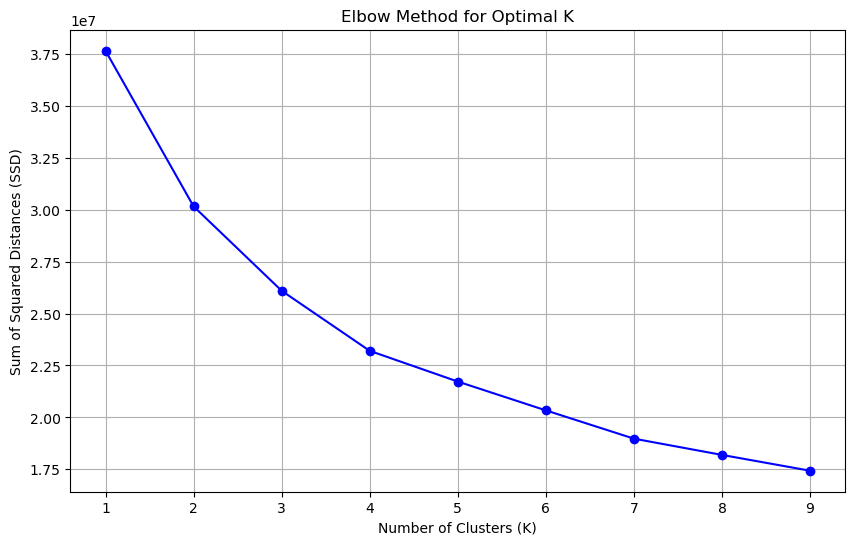

In [75]:
# 엘보우 메소드 구현
ssd = []  # Sum of Squared Distances
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca50)
    ssd.append(kmeans.inertia_)  # 군집 내의 총 제곱 거리
    
# 엘보우 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.xticks(K)
plt.show()

In [76]:
# 엘보우 포인트 찾기: SSD의 변화율 계산
ssd_diff = np.diff(ssd)  # SSD의 1차 차분
ssd_diff2 = np.diff(ssd_diff)  # SSD의 2차 차분

# 엘보우 포인트의 인덱스 찾기
elbow_index = np.argmax(ssd_diff2) + 1  # 2차 차분이 최대인 인덱스 찾음
optimal_k = elbow_index + 1  # K의 값은 1부터 시작하므로 인덱스에 1을 더함

print(f'Optimal K based on Elbow Method: {optimal_k}')

Optimal K based on Elbow Method: 2


### k-means 최적의 군집 개수로 다시 군집화 하여 시각화 하시오.

C:\Users\sihyun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Clustering Results:
   Cluster  Count
0        0  28786
1        1  31214


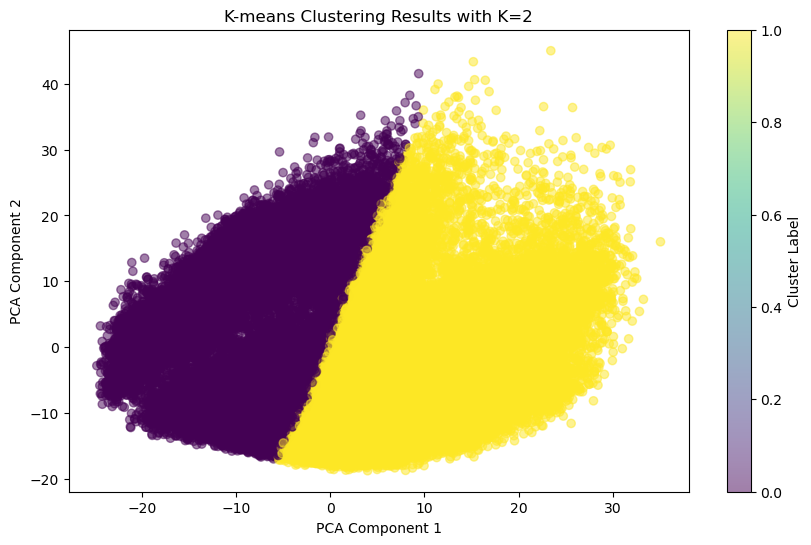

In [77]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca50)

labels, counts = np.unique(kmeans_labels, return_counts=True)
cluster_results = pd.DataFrame({'Cluster': labels, 'Count': counts})

print("K-means Clustering Results:")
print(cluster_results)


plt.figure(figsize=(10, 6))
plt.scatter(X_pca50[:, 0], X_pca50[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering Results with K=2')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

### 다른 추가적인 군집화 기법을 2가지 이상 사용하여 pca 50 데이터를 시각화 하시오.

GMM Clustering Results:
Cluster 0: Count = 5784
Cluster 1: Count = 6282
Cluster 2: Count = 9339
Cluster 3: Count = 5290
Cluster 4: Count = 7558
Cluster 5: Count = 2377
Cluster 6: Count = 8499
Cluster 7: Count = 3923
Cluster 8: Count = 3952
Cluster 9: Count = 6996


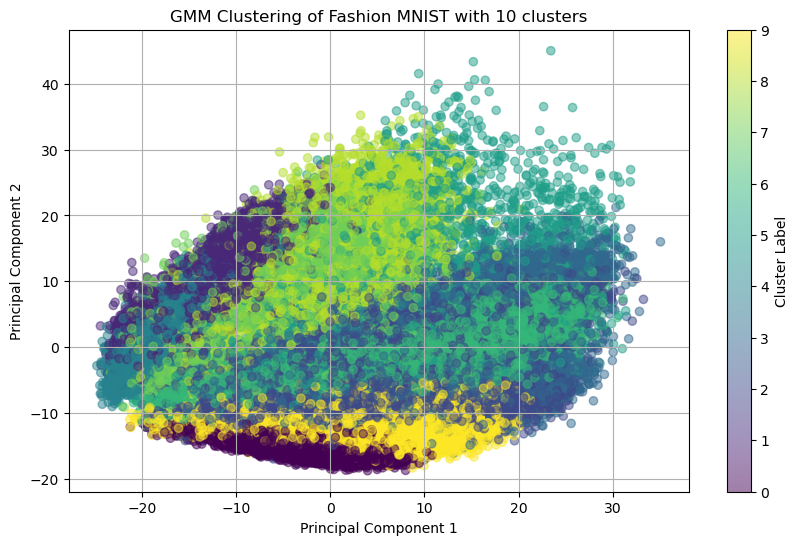

In [20]:
from sklearn.mixture import GaussianMixture

# GMM 가우시안 믹스처 모델 군집화
n_clusters = 10  # 군집 수 설정
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(X_pca50)
gmm_labels = gmm.predict(X_pca50)

# 군집화 결과 확인
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_results = dict(zip(unique_labels, counts))
print("GMM Clustering Results:")
for cluster, count in cluster_results.items():
    print(f"Cluster {cluster}: Count = {count}")

plt.figure(figsize=(10, 6))
plt.scatter(X_pca50[:, 0], X_pca50[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('GMM Clustering of Fashion MNIST with 10 clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

In [9]:
!pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11719 sha256=8497de9a00c325feab3d5eb3bab7e24d8a3afdef0f8a21b24f9731abb07f1ada
  Stored in directory: c:\users\sihyun\appdata\local\pip\cache\wheels\96\98\a5\52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


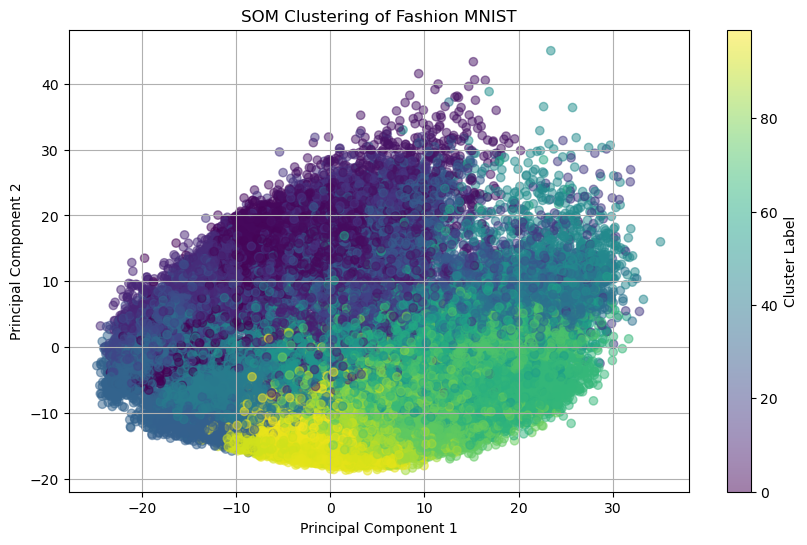

In [11]:
from minisom import MiniSom

# SOM 
som_x, som_y = 10, 10  # 10x10 SOM 맵
som = MiniSom(x=som_x, y=som_y, input_len=50, sigma=1.0, learning_rate=0.5, random_seed=42)

som.train_random(X_pca50, num_iteration=1000)

# SOM을 통해 각 데이터 포인트에 대한 군집 매핑
mapped = np.array([som.winner(x) for x in X_pca50])
labels = np.array([n[0] * som_y + n[1] for n in mapped])  # SOM 좌표를 군집 레이블로 변환

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca50[:, 0], X_pca50[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('SOM Clustering of Fashion MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

In [12]:
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_results = dict(zip(unique_labels, counts))
print("SOM Clustering Results:")
for cluster, count in cluster_results.items():
    print(f"Cluster {cluster}: Count = {count}")

SOM Clustering Results:
Cluster 0: Count = 699
Cluster 1: Count = 877
Cluster 2: Count = 1575
Cluster 3: Count = 1266
Cluster 4: Count = 514
Cluster 5: Count = 583
Cluster 6: Count = 137
Cluster 7: Count = 447
Cluster 8: Count = 266
Cluster 9: Count = 769
Cluster 10: Count = 833
Cluster 11: Count = 704
Cluster 12: Count = 1721
Cluster 13: Count = 233
Cluster 14: Count = 393
Cluster 15: Count = 896
Cluster 16: Count = 147
Cluster 17: Count = 207
Cluster 18: Count = 23
Cluster 19: Count = 679
Cluster 20: Count = 574
Cluster 21: Count = 750
Cluster 22: Count = 1032
Cluster 23: Count = 1160
Cluster 24: Count = 743
Cluster 25: Count = 416
Cluster 26: Count = 424
Cluster 27: Count = 98
Cluster 28: Count = 759
Cluster 29: Count = 510
Cluster 30: Count = 1261
Cluster 31: Count = 1128
Cluster 32: Count = 1351
Cluster 33: Count = 1110
Cluster 34: Count = 1165
Cluster 35: Count = 207
Cluster 36: Count = 1196
Cluster 37: Count = 773
Cluster 38: Count = 689
Cluster 39: Count = 24
Cluster 40: Count 

## 군집화 결과 비교

### 앞선 모든 군집화 모델의 결과를 실루엣 점수(Silhouette score)를 이용하여 성능을 비교하시오.

In [13]:
from sklearn.metrics import silhouette_score

In [18]:
# DBSCAN에서 노이즈 제외하고 실루엣 점수 계산
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_pca50[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
else:
    dbscan_silhouette = -1  # 군집이 없는 경우

In [21]:
kmeans_silhouette = silhouette_score(X_pca50, kmeans_labels)

gmm_silhouette = silhouette_score(X_pca50, gmm_labels)

som_silhouette = silhouette_score(X_pca50, labels)

# 결과 출력
print("Silhouette Scores:")
print(f"K-means: {kmeans_silhouette:.4f}")
print(f"DBSCAN: {dbscan_silhouette:.4f}")
print(f"GMM: {gmm_silhouette:.4f}")
print(f"SOM: {som_silhouette:.4f}")

Silhouette Scores:
K-means: 0.1851
DBSCAN: -0.0375
GMM: 0.0776
SOM: 0.0776


### 실루엣 점수를 통해 군집화 모델의 성능에 대한 간단한 해석을 적으세요.

K-means모델이 다른 군집화 모델보다 높은 성능을 기록했다. 상대적으로 적절한 군집화를 제공했음으로 보인다.\
성능을 더 높이기 위해서는 K 값을 조정하는 것이 필요할 것 같다.